# Project3 - Nonlinear Filtering - Weighted rank order filters

<h1> 1. Introduction </h1>
<p> The essential limitations of linear operations occur when, for example, the distribution of noise in the image is no longer gaussian, and moreover, this noise is not additive. Such a noise is the impulsive type noise, characterized by maximum or minimum amplitudes relative to the range of values from the image. The impulsive noise replaces some of the pixels of the images by very small or very high values, the result being what is called "salt and pepper" type noise, due to points very light (white) and very dark (black) that replace the image pixels</p>
<p> Applying a linear smoothing filter to such a noise would result in an accentuation of the noise points by "stretching" them and incorporating the correct values around them, as we can see in Fig. 1.</p>
<figure>
    <center>
        <img src="img/00.png"/>
    </center>
<center>Fig. 1 Linear smoothing filter applied on an image with salt and pepper noise </center>
</figure>

<h1 id="2"> 2. Rank order filters </h1>

<p> A different class of filters is thus necessary. Such filters are nonlinear - they are no longer based on the principle of superposition. An essential class of such filters are those of ordering, which have the effect of pushing extreme values (outliers) at the beginning or end of the array of values from a neighborhood.</p>

<p> Rank order filters are local, neighbourhood operators - the filter is defined on a neighbourhood. The filter selects the gray values from the neighbourhood of the current pixel and the selected values are sorted ascendingly; we will denote the values of the pixels from the neighbourhood with {x1, x2, ..., xK}, and the same values sorted ascendingly with {x(1), x(2), ..., x(K)}. The values x(i)are called rank ordered statistics and have the property: </p>

<center>
<img src="img/01.png"/>
</center>
<p> The output of the rank order filter of rank k is the k-th order statistics, with k ∈[1;K] </p>
<center>
<img src="img/03.png"/>
</center>
<center>Fig 2. Example of rank order filter </center>

<h2> 2.1 The Median Filter </h2>
<p> The median filter is a particular case of the rank order filter in which the returned value is the value in the middle of the sequence of ordered values. This is suitable for eliminating salt and pepper noise, because the extreme values will be at the beginning and end of the sorted array, thus in the middle we will have values close to the original value replaced by noise (given the spatial correlation of pixels in the image)</p>
<center>
<img src="img/04.png"/>
</center>

<p> In practice, considerring neighbourhoods with odd number of pixels, the median filter will be</p>
<div><center> <img style="display: inline" src="img/05.png"/> (1) </center></div>

<h2 id="2-2"> 2.2 Weighted rank order filters </h2>
<p> Both linear and order filters are based on the same principle of the sliding window. The processing performed on the selected values is different, but it can be noticed that the linear filtering structure allows the realization of an infinite number of linear filters for the same window (by varying the weighting coefficients </p>
<p> The weighting of order filters cannot be done by multiplying the values selected by the window with different coefficients. Instead, the weighting can strengthen the influence of certain pixels in the filtering window. This is done by repeating several times an encountered value, to increase the probability of meeting it in the desired statistics.</p>
<img src="img/06.png">

<h1 id="5"> 3. Exercises </h1>
<h2> 3.1 Rank order filter </h2>

<p>
Write a function that implements the rank order filter (already done at the lab, but make it a function). The size of the filter will be given as an input variable (ex: 3 for a 3x3 neighbourhood, 5 for a 5x5 neighbourhood). The desired output rank will also be given as a variable.<br/>
Load the image Lena.<br/>
Apply salt and pepper noise to the image. Visualize the noisy image.<br/>
Using the function written above, apply the median filter to the noisy image and visualize the result.<br/>
Apply the 1st rank order filter on the original image. Apply the maximum rank order filter on the original image. Comment the results <br/>
</p>
  

Text(0.5, 1.0, 'Image  maximum rank order filter')

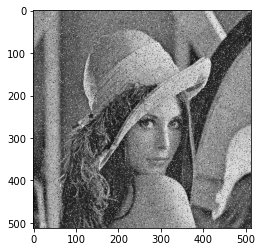

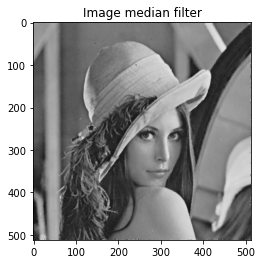

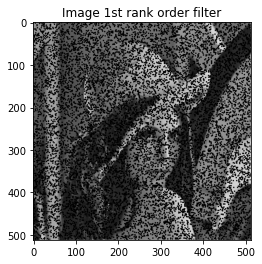

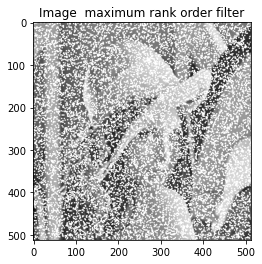

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,util,color

img_original = io.imread('lena.png')
img_gray=np.copy(img_original)
# Convert the image to a gray scale with values between 0-1 and multiply for 255
img_gray=color.rgb2gray(img_original)
img_noise=util.random_noise(img_gray,'s&p',amount=0.1)
img_noise=(img_noise*255).astype(int)

plt.figure(),plt.imshow(img_noise,cmap='gray')

def rank_order_filter(img,kernel_size,order):
    img_noise =np.copy(img)
    img_filtered=np.copy(img)
    mask_size=int(kernel_size**0.5)
    if order> kernel_size:
        print("Error order out of range")
        return img
    else:
    
        for i in range(mask_size//2,img_noise.shape[0]-mask_size//2):
            for j in range(mask_size//2,img_noise.shape[1]-mask_size//2):
                V = img_noise[i-mask_size//2:i+mask_size//2+1,j-mask_size//2:j+mask_size//2+1]
                n=np.sort(V,None)
                img_filtered[i,j] =n[order]
    return img_filtered
        
neigbourhood_size=9
## median filter
img_filtered_median=rank_order_filter(img_noise,neigbourhood_size,neigbourhood_size//2)
# 1st order rank filter
img_filtered_1st=rank_order_filter(img_noise,neigbourhood_size,0)
#Maximum order rank
img_filtered_max=rank_order_filter(img_noise,neigbourhood_size,neigbourhood_size-1)
plt.figure(), plt.imshow(img_filtered_median,cmap='gray',vmin=0,vmax=255)
plt.title("Image median filter")
plt.figure(), plt.imshow(img_filtered_1st,cmap='gray',vmin=0,vmax=255)
plt.title("Image 1st rank order filter")
plt.figure(), plt.imshow(img_filtered_max,cmap='gray',vmin=0,vmax=255)
plt.title("Image  maximum rank order filter")

## Comment the results
# When apllying first order rank , we are taking allaways the darker pixel of the neigbourhood so the peper noise spread,
# we eliminate the salt noise and the image get darker
# When apllying maximum order rank , we are taking allaways the lighter pixel of the neigbourhood so the salt noise spread,
# we eliminate the peper noise and the image get darker


<h2> 3.2 Weighted rank order filters </h2>
<p> Write a function that implements the weighted rank order filter on a 3x3 neighbourhood. The weights will be given as a mask - it's your choice if the mask is a matrix or an array. The output of the filter will be the median value. Apply the resulting filter on the image Lena.
</p>


NameError: name 'img_filtered_median' is not defined

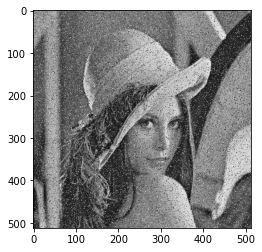

<Figure size 432x288 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,util,color

img_original = io.imread('lena.png')
img_gray=np.copy(img_original)
# Convert the image to a gray scale with values between 0-1 and multiply for 255
img_gray=color.rgb2gray(img_original)
img_noise=util.random_noise(img_gray,'s&p',amount=0.1)
img_noise=(img_noise*255).astype(int)

plt.figure(),plt.imshow(img_noise,cmap='gray')

def weighted_mask(V,kernel):
    mask=[]
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            for _ in range(kernel[i,j]):
                mask.append(V[i,j])
    return np.array(mask)
            
            
            

def Weighted_rank_order_filter(img,kernel):
    img_noise =np.copy(img)
    img_filtered=np.copy(img)
    mask_size=int(kernel.size**0.5)

    for i in range(mask_size//2,img_noise.shape[0]-mask_size//2):
        for j in range(mask_size//2,img_noise.shape[1]-mask_size//2):
            V = img_noise[i-mask_size//2:i+mask_size//2+1,j-mask_size//2:j+mask_size//2+1]
            n=weighted_mask(V,kernel)
            n=np.sort(n,None)
            img_filtered[i,j] =n[n.size//2]
    return img_filtered
kernel=np.array([[1,2,1],
                 [2,3,2],
                 [1,2,1]])
img_filtered_weight_rank=Weighted_rank_order_filter(img_noise,kernel)
plt.figure(), plt.imshow(img_filtered_median,cmap='gray',vmin=0,vmax=255)
plt.title("Image Weighted rank filtered")

